## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa.display
import librosa
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
path=[]
label=[]
for dirname,_,filenames in os.walk('./dataset/'):
    for filename in filenames:
        path.append(os.path.join(dirname,filename))
        lab=filename.split('_')[-1].split('.')[0]
        label.append(lab.lower())
print('Dataset loaded')


Dataset loaded


In [3]:
print(path[:5])

['./dataset/OAF_angry\\OAF_back_angry.wav', './dataset/OAF_angry\\OAF_bar_angry.wav', './dataset/OAF_angry\\OAF_base_angry.wav', './dataset/OAF_angry\\OAF_bath_angry.wav', './dataset/OAF_angry\\OAF_bean_angry.wav']


In [4]:
print(label[:5])

['angry', 'angry', 'angry', 'angry', 'angry']


## Create a dataframe

In [5]:
df=pd.DataFrame({'speech':path,'label':label})
df.head()

,speech,label
0,./dataset/OAF_angry\OAF_back_angry.wav,angry
1,./dataset/OAF_angry\OAF_bar_angry.wav,angry
2,./dataset/OAF_angry\OAF_base_angry.wav,angry
3,./dataset/OAF_angry\OAF_bath_angry.wav,angry
4,./dataset/OAF_angry\OAF_bean_angry.wav,angry


In [6]:
df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

## EDA (Exploratory Data Analysis)

<Axes: xlabel='label', ylabel='count'>

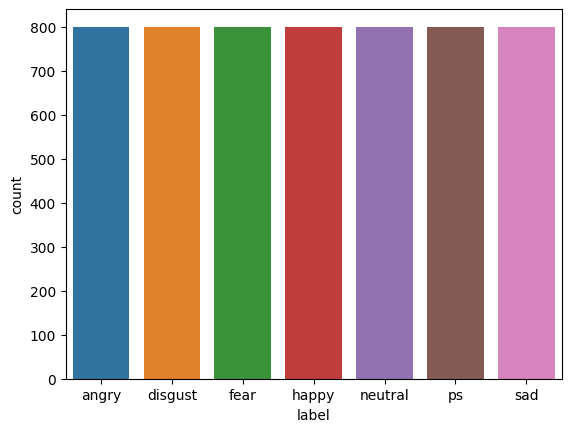

In [7]:
sns.countplot(x=df['label'])

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

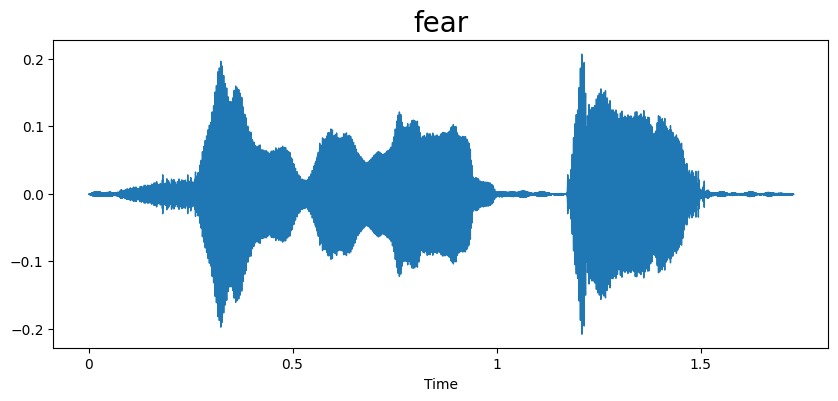

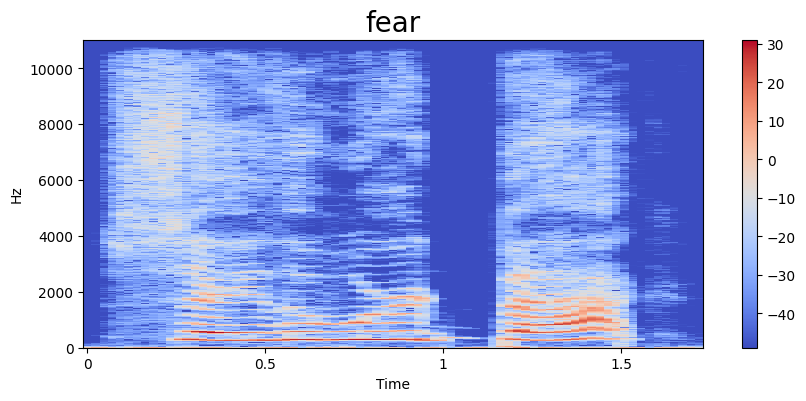

In [9]:
emotion = 'fear'
path=df['speech'][df['label']==emotion].values[0]
data,smaple_rate=librosa.load(path)
waveplot(data,smaple_rate,emotion)
spectrogram(data,smaple_rate,emotion)
Audio(path)

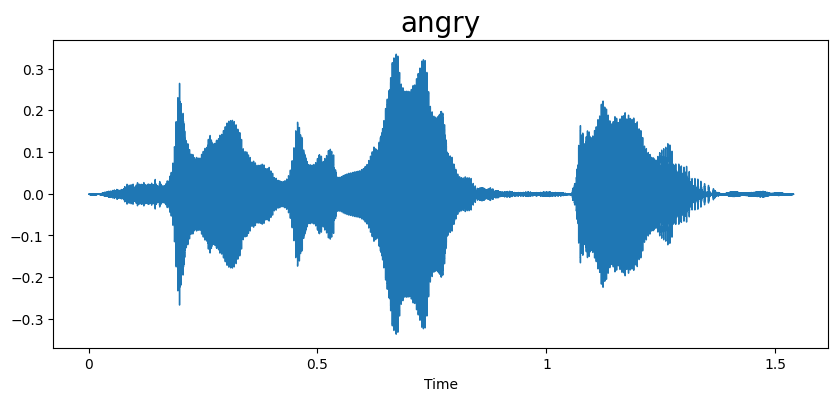

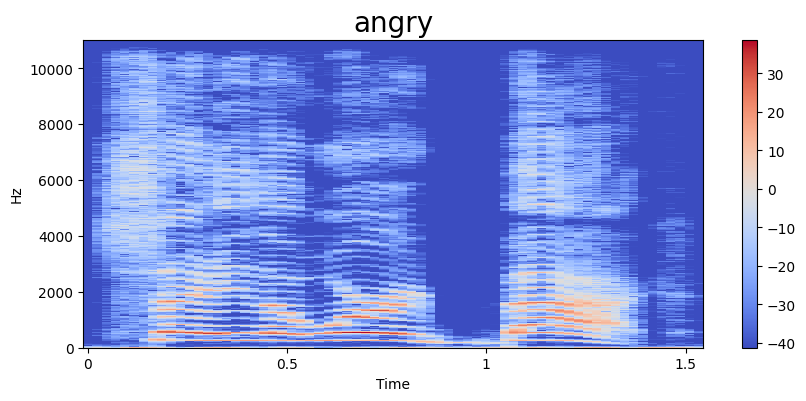

In [10]:
emotion = 'angry'
path=df['speech'][df['label']==emotion].values[0]
data,smaple_rate=librosa.load(path)
waveplot(data,smaple_rate,emotion)
spectrogram(data,smaple_rate,emotion)
Audio(path)

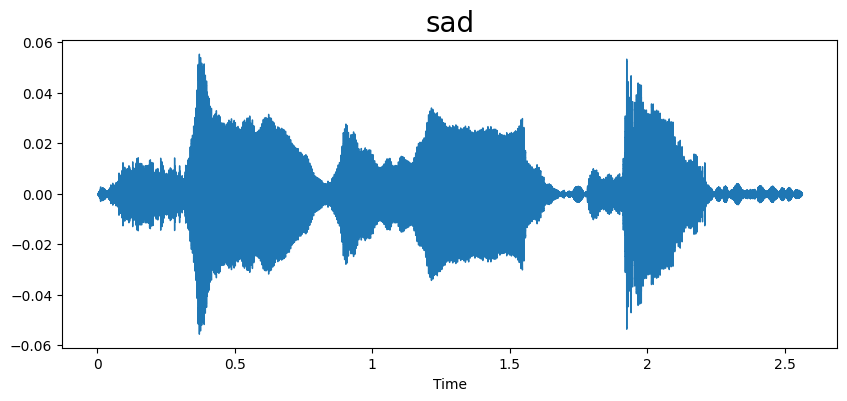

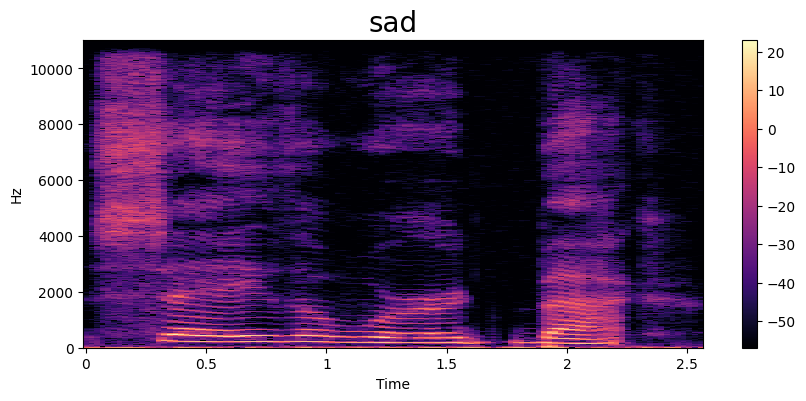

In [11]:
emotion = 'sad'
path=df['speech'][df['label']==emotion].values[0]
data,smaple_rate=librosa.load(path)
waveplot(data,smaple_rate,emotion)
spectrogram(data,smaple_rate,emotion)
Audio(path)

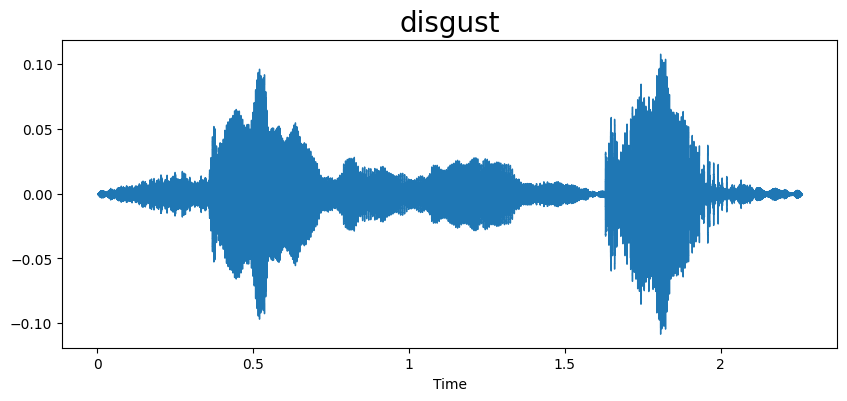

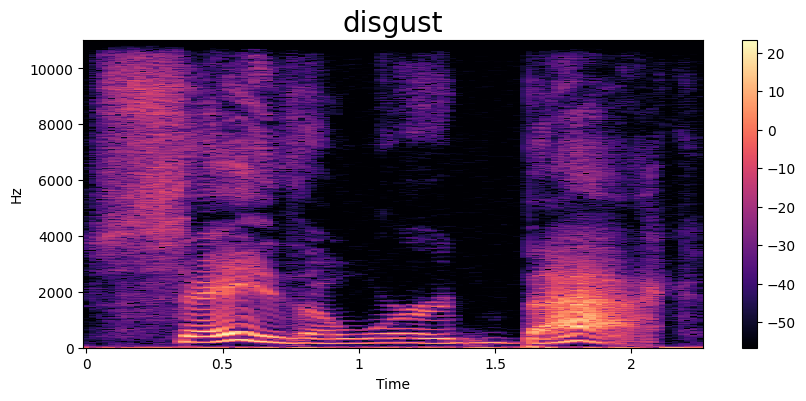

In [12]:
emotion = 'disgust'
path=df['speech'][df['label']==emotion].values[0]
data,smaple_rate=librosa.load(path)
waveplot(data,smaple_rate,emotion)
spectrogram(data,smaple_rate,emotion)
Audio(path)

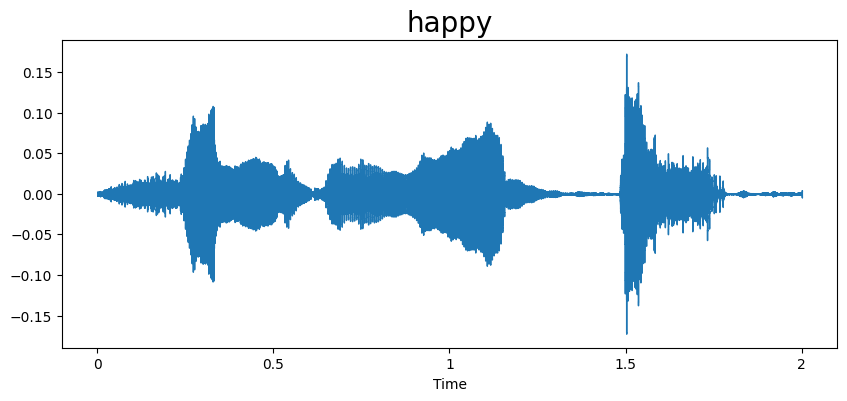

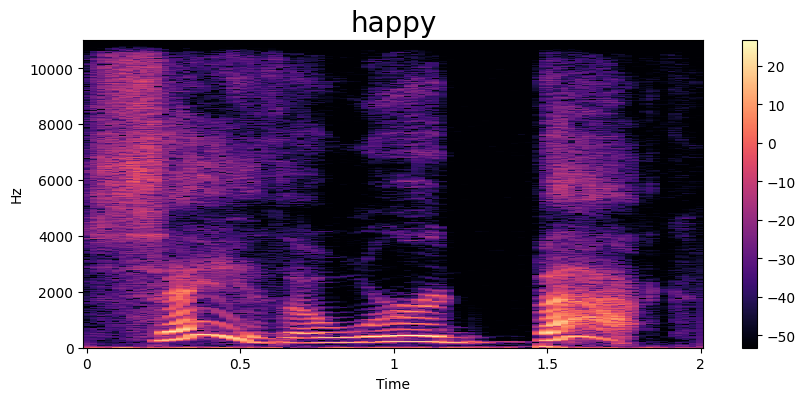

In [13]:
emotion = 'happy'
path=df['speech'][df['label']==emotion].values[0]
data,smaple_rate=librosa.load(path)
waveplot(data,smaple_rate,emotion)
spectrogram(data,smaple_rate,emotion)
Audio(path)

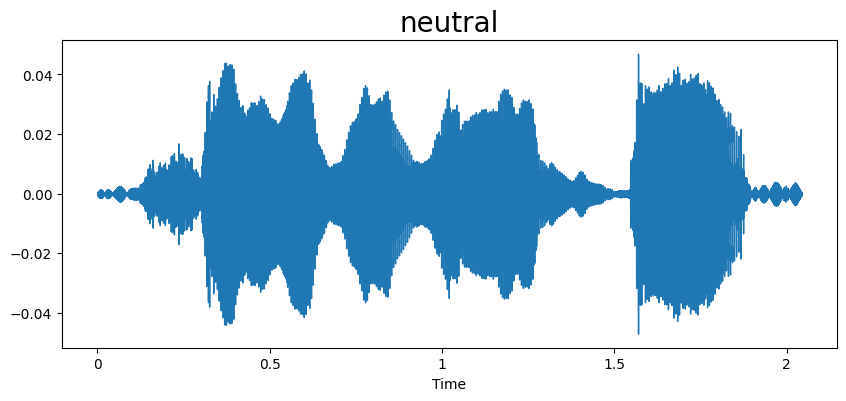

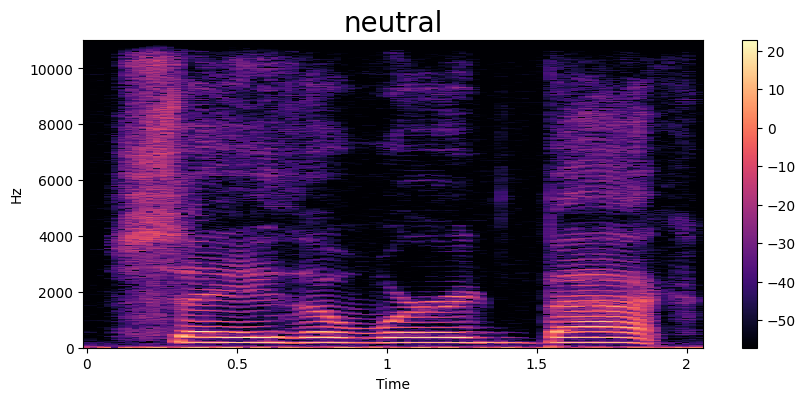

In [14]:
emotion = 'neutral'
path=df['speech'][df['label']==emotion].values[0]
data,smaple_rate=librosa.load(path)
waveplot(data,smaple_rate,emotion)
spectrogram(data,smaple_rate,emotion)
Audio(path)

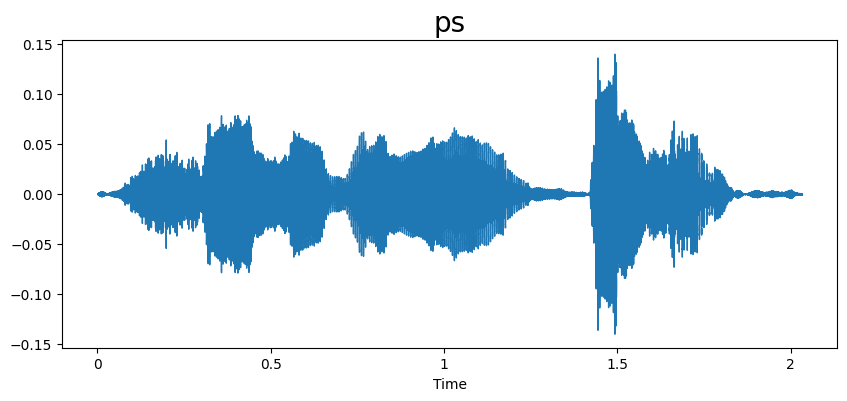

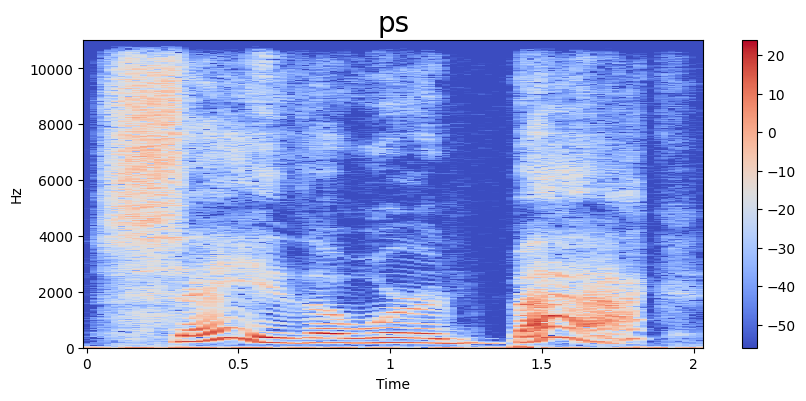

In [15]:
#Plesent Surprise
emotion = 'ps'
path=df['speech'][df['label']==emotion].values[0]
data,smaple_rate=librosa.load(path)
waveplot(data,smaple_rate,emotion)
spectrogram(data,smaple_rate,emotion)
Audio(path)

## Feature Extraction

### Mel Frequency Cepstral Coefficients (MFCC)
* Set of features that concisely describe the overall shape of a spectral envelope.
* Used for short term analysis of speech.

In [16]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [17]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54757, 24.800041, 43.04809, 4...
5597    [-378.50494, 80.91062, 35.30053, 39.74792, -4....
5598    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [18]:
X=np.array(X_mfcc.tolist())
X.shape

(5600, 40)

In [19]:
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [20]:
from keras.utils import to_categorical
Y=to_categorical(df['label'].map({'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'ps':5,'sad':6}))
Y.shape

(5600, 7)

In [21]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Create LSTM Model

#### Layers
* LSTM Layer
* Dense Layer
* Dropout Layer
* Dense Layer
* Dropout Layer
* Dispose Layer
<br/>
activation function: Rectified Linear Unit (ReLU)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

### Train the model

In [24]:
history=model.fit(X,Y,epochs=100,batch_size=512,validation_split=0.2,shuffle=True)

Epoch 1/100
9/9 [==============================] - 6s 313ms/step - loss: 1.8556 - accuracy: 0.2946 - val_loss: 1.8489 - val_accuracy: 0.2348
Epoch 2/100
9/9 [==============================] - 2s 261ms/step - loss: 1.6358 - accuracy: 0.4210 - val_loss: 1.5997 - val_accuracy: 0.3562
Epoch 3/100
9/9 [==============================] - 2s 227ms/step - loss: 1.3468 - accuracy: 0.5123 - val_loss: 1.2902 - val_accuracy: 0.4982
Epoch 4/100
9/9 [==============================] - 2s 227ms/step - loss: 1.0559 - accuracy: 0.5835 - val_loss: 0.8790 - val_accuracy: 0.6304
Epoch 5/100
9/9 [==============================] - 2s 217ms/step - loss: 0.8179 - accuracy: 0.6663 - val_loss: 0.6143 - val_accuracy: 0.6679
Epoch 6/100
9/9 [==============================] - 2s 228ms/step - loss: 0.6605 - accuracy: 0.7337 - val_loss: 0.4432 - val_accuracy: 0.8625
Epoch 7/100
9/9 [==============================] - 2s 225ms/step - loss: 0.5342 - accuracy: 0.8049 - val_loss: 0.3176 - val_accuracy: 0.9098
Epoch 8/100
9

### Results and Evaluation

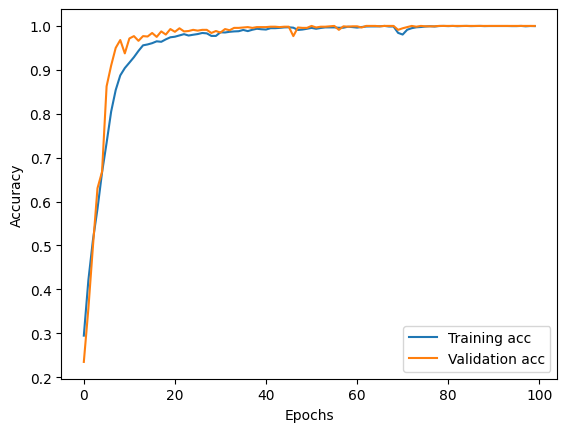

In [25]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

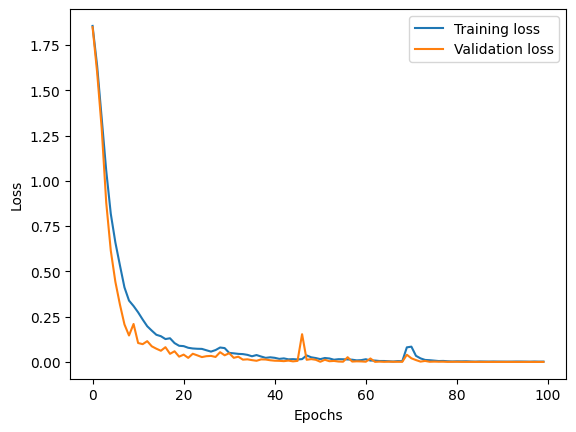

In [26]:
epochs=list(range(100))
loss=history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
model.save('model.h5')

In [28]:
model.input

<KerasTensor: shape=(None, 40, 1) dtype=float32 (created by layer 'lstm_input')>

In [32]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
